# Introduction to Feature engineering

The  goal of this notebook is to give an isntance of choosing features in scikit-learn for subsequent analysis.
We are going to  use the **f_classif , f_regression , SelectKBest** methods from the **sklearn.feature_selection**  method

1. f_classif : It simply computes the Anova F-value for the provided sample
2. f_regression: Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature seletion procedure, not a free standing feature selection procedure

ANOVA: Analysis of variance: It's a statistical approach which consits of comparing means of different classes between each other to determine whether at least one differs from the others. The typical scenario of an ANOVA is when measuring the effect of a categorical variable (the target) on a continuous variable (independant variable).

$$SST = SSA + SSE$$

$$SST =  \sum_{i=1}^{n} (y_{i}  - \bar{y})$$

$\bar{y}$ is the mean of the actual column  and $y_{i}$ is the $i^{th}$ element in the column (somme des écarts par rapport à la moyenne)


$$SSE  =  \sum_{j=1}^{k} \sum_{i=1}^{n} ( y_{ij} - \bar{y_{j}})^{2}$$

$ y_{ij}$ is the $i^{th}$ element in the class $j$ and $\bar{y_{j}}$ is the mean of the group $j$ (Somme des carrés de écarts par rapport à  la moyenne de chaque groupe)

$df_{erreur} = k(n-1)$ and $df_{A} = (k-1)$ 
where $df$ is the degree of freedom. Then, $MSA = \frac{SSA}{df_{A}}$ and $MSE = \frac{SSE}{df_{erreur}}$

Now, we compute the ratio:  $$F = \frac{MSA}{MSE}$$

If $F>1$ , then there is an effect of treatment continuous variable on the class. Which means the atual feature does have an influence on the target variable

The ANOVA is an extension of the t-test which applies to categorical variable with more than two classes

#On selectionne par exemple la colonne sepal lenght on compare les moyennes des mesures appartenant à chaque classe dans cette colonne. F<1 signifierai que la moyenne en général ne différe pas selon qu'on change de classe.
Et pourtant si F>1, on pourra dire qu'il y a un traitement certes inexpikée qui entraine cette variation de moyenne.
Ceci iplique donc l'attribut en question aurait une influence sur les classes. (même principe que la corrélation)

### 1. SelectKBest  with  f_classif , f_regession

In [195]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
#We load our different methods
from sklearn.feature_selection import (f_classif , f_regression , SelectKBest)

In [197]:
from sklearn.datasets import load_iris

In [198]:
iris=load_iris()

In [199]:
X = iris.data
y = iris.target

In [200]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [201]:
df = pd.DataFrame(X, columns= iris.feature_names)

In [202]:
df['label']= iris.target

In [203]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [204]:
def select_kbest_clf(data_frame, target, k):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores 

In [205]:
#In this cas, k=1. Which means we only choose the best feature critically helping predicting classes #
#(the largest value of k and check the support column )
select_kbest_clf(df , 'label' ,k=1)

,F Score,P Value,Support,Attribute
0,119.264502,1.669669e-31,False,sepal length (cm)
1,47.364461,1.327917e-16,False,sepal width (cm)
2,1179.034328,3.051976e-91,True,petal length (cm)
3,959.324406,4.376957e-85,False,petal width (cm)


For the f-regression, it just computes the correlation between each regressor and the target and convert it into the F-score and then the p-value

In [206]:
X_ = np.random.rand(1000, 3)
y_ = X_[:, 0] + np.sin(6 * np.pi * X_[:, 1]) + 0.1 * np.random.randn(1000)

In [207]:
Xy_fscore , Xy_pvalue =f_regression(X_,y_)

In [208]:
Xy_fscore

array([1.77074067e+02, 7.09532494e+01, 1.23072695e-02])

In [209]:
Xy_pvalue

array([2.59651807e-37, 1.26210158e-16, 9.11687712e-01])

### The f-test does well on capturing linear relationships. When it comes to unlinear relationship, it works poorly

### 2. Mutual Info regression

Mutual information (MI) between two random variables is a non-negative
value, which measures the dependency between the variables. It is equal
to zero if and only if two random variables are independent, and higher
values mean higher dependency.

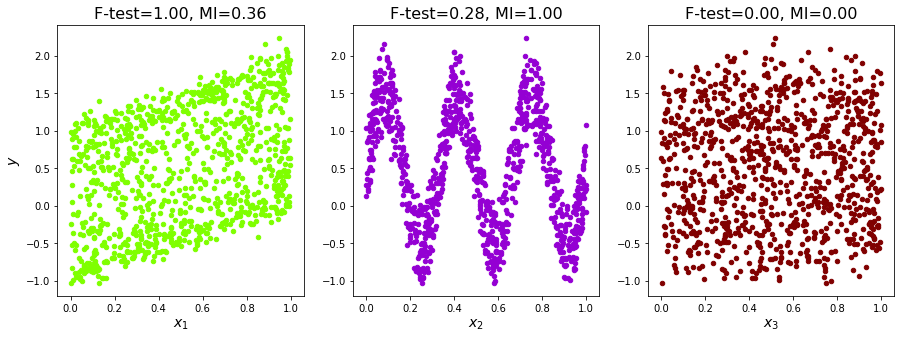

In [210]:
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X1 = np.random.rand(1000, 3)
y1 = X1[:, 0] + np.sin(6 * np.pi * X1[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X1, y1)
f_test /= np.max(f_test)  #normalisation

mi = mutual_info_regression(X1, y1)
mi /= np.max(mi) #normalisation
colors = ['chartreuse' , 'darkviolet' , 'maroon']
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X1[:, i], y1,c = colors[i], s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(round(f_test[i],4), round(mi[i],4)),
              fontsize=16)
plt.show()

In [211]:
colors[0]

'chartreuse'

## Variance Threshold


This method removes features with variation below a certain cutoff.

The idea is when a feature doesn’t vary much within itself, it generally has very little predictive power.



Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the
desired outputs (y), and can thus be used for unsupervised learning.


In [213]:
sklearn.feature_selection.VarianceThreshold

NameError: name 'sklearn' is not defined

Variance Threshold doesn’t consider the relationship of features with the target variable

In [215]:
from sklearn.feature_selection import VarianceThreshold

In [216]:
fs = VarianceThreshold(0.5)

In [217]:
fs.fit(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']])

VarianceThreshold(threshold=0.5)

In [218]:
fs.variances_

array([0.68112222, 0.18675067, 3.09242489, 0.57853156])

In [221]:
def Variance_decision(data_frame ,target, rho):
    #always make sure the target is a column in the dataframe
    #target can also be ignored in this process
    """
    Selecting best features for supervising (or unsupervizing) task according to a certain threshold
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param rho: threshold for the variance to not go below
    :returns Variance threshold decision dataframe with
    ** variance for each feature in the data
    ** Support returns True or False for features crossing or not the threshold
    ** Attributes is the actual columns
    
    """
    #Instantiation of the method with a set parameter rho
    Vts = VarianceThreshold(rho)
    
    #We fit our method to the data
    Vts.fit(data_frame.drop(target, axis=1))
    #Vts.fit_transform can straightly give you an array with the right set of features 
    
    #we create a dataframe for setting our results in
    Var_df = pd.DataFrame()
    
    #We define a column called variance with variances of each colmumn in it
    Var_df['variances'] = Vts.variances_
    
    #We define the column with set false for each not matching our criteria
    Var_df['support'] = Vts.get_support()
    
    #A reminder of the actual columns we are dealing with
    Var_df['attributes'] = data_frame.drop(target, axis=1).columns
    
    return Var_df

In [222]:
Variance_decision(df , 'label',0.5)

,variances,support,attributes
0,0.681122,True,sepal length (cm)
1,0.186751,False,sepal width (cm)
2,3.092425,True,petal length (cm)
3,0.578532,True,petal width (cm)


In [224]:
VarianceThreshold?

## WRAPPER METHODS

### Recursive Feature Elimination

In [86]:
from sklearn.feature_selection import RFE , RFECV

Given an external estimator that assigns weights to features (e.g., the
coefficients of a linear model), the goal of recursive feature elimination
(RFE) is to select features by recursively considering smaller and smaller
sets of features. First, the estimator is trained on the initial set of
features and the importance of each feature is obtained either through a
``coef_`` attribute or through a ``feature_importances_`` attribute.
Then, the least important features are pruned from current set of features.
That procedure is recursively repeated on the pruned set until the desired
number of features to select is eventually reached.

In [102]:
RFE?

In [103]:
from sklearn.datasets import make_friedman1

Let's use the Friedman dataset which is a dataset for a regression problem

X are number uniformedly distributed between 0 and 1
y obeys to the following equation


$$y(X) = 10 * \sin(\pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1)$$

In [124]:
X2, y2 = make_friedman1(n_features=10 , n_samples=10)

In [115]:
from sklearn.linear_model import (LinearRegression , LogisticRegression , Ridge)

In [148]:
from sklearn.linear_model import SGDRegressor , ARDRegression , HuberRegressor

In [116]:
from sklearn.svm import (SVR , SVC)

In [155]:
HuberRegressor?

In [156]:
#Instantiate the estimator
e1 = LinearRegression(fit_intercept=True, normalize=False, n_jobs=1)
#e2 = LogisticRegression(penalty='l2' , verbose=0)
e2 = SGDRegressor(loss = 'squared_loss' , alpha = 0.001, epsilon=0.1)
e3 = ARDRegression(tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06)
#e3 = Ridge(alpha=0.5 , solver= 'cholesky')
e4 = SVR(kernel= 'linear' , epsilon=0.05 , C=1.2)
e5 = HuberRegressor(epsilon=1.35, max_iter=10, alpha=0.0001)
#e5 =   SVC(kernel= 'rbf' , gamma = 'auto' , tol= 0.0015 )

In [157]:
selector1 = RFE(e1 , n_features_to_select=5 , step = 1)
selector1.fit(X2,y2)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=5, step=1, verbose=0)

In [158]:
selector1.support_


array([ True,  True, False,  True,  True, False, False, False, False,
        True])

In [159]:
selector1.ranking_

array([1, 1, 2, 1, 1, 3, 5, 4, 6, 1])

In [160]:
selector2 = RFE(e2 , n_features_to_select=5 , step = 1)
selector2.fit(X2,y2)

/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), Fut

RFE(estimator=SGDRegressor(alpha=0.001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [161]:
selector2.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [137]:
selector3 = RFE(e3 , n_features_to_select=5 , step = 1)
selector3.fit(X2,y2)

RFE(estimator=Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001),
  n_features_to_select=5, step=1, verbose=0)

In [138]:
selector3.support_

array([ True, False,  True, False, False, False, False,  True,  True,
        True])

In [140]:
selector3.ranking_

array([1, 4, 1, 2, 3, 5, 6, 1, 1, 1])

In [146]:
selector4 = RFE(e4, n_features_to_select=5 , step = 1)
selector4.fit(X2,y2)

RFE(estimator=SVR(C=1.2, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
  n_features_to_select=5, step=1, verbose=0)

In [147]:
selector4.support_

array([False,  True,  True, False, False, False,  True,  True,  True,
       False])

In [162]:
selector5 = RFE(e5 , n_features_to_select=5 , step = 1)
selector5.fit(X2,y2)

RFE(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=10,
        tol=1e-05, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)

In [163]:
selector5.support_

array([ True, False,  True, False,  True, False, False,  True, False,
        True])

In [ ]:
Model_Sel_df = pd.DataFrame

In [184]:
def Feature_model_selector(X, y ,nf): #nf = number of features
    """
    Takes the dataframe and many estimators and return a dataframe
    with the best 5 features from each model
    """
    Models = ['linear_regression' , 'Stoch_Grad_desc', 'Bay_ARDRregr', 'Sup_Vec_Regr','Huber_Regr']
    #Instantiate the estimator
    e1 = LinearRegression(fit_intercept=True, normalize=False, n_jobs=1)
    e2 = SGDRegressor(loss = 'squared_loss' , alpha = 0.001, epsilon=0.1)
    e3 = ARDRegression(tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06) #BayesianARDregres

    e4 = SVR(kernel= 'linear' , epsilon=0.05 , C=1.2)
    e5 = HuberRegressor(epsilon=1.35, max_iter=10, alpha=0.0001)
    s1 =  RFE(e1 , n_features_to_select=5 , step = 1)
    s2=   RFE(e2 , n_features_to_select=5 , step = 1)
    s3=   RFE(e3 , n_features_to_select=5 , step = 1)
    s4=    RFE(e4 , n_features_to_select=5 , step = 1)
    s5=    RFE(e5 , n_features_to_select=5 , step = 1)
    features = []
    for i in range(X.shape[1]):
        features.append('f_' + str(i))
    
        results = pd.DataFrame(columns= Models ,index=features)

    for i, selector in enumerate([s1 , s2, s3 , s4, s5]):
        selector.fit(X,y)
        results[Models[i]] = selector.support_
        
    return results
        
        
        
        

In [190]:
clean = Feature_model_selector(X, y ,5)

/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/rockefeller/Bureau/Anaconda/yes/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), Fut

In [193]:
clean

,linear_regression,Stoch_Grad_desc,Bay_ARDRregr,Sup_Vec_Regr,Huber_Regr
f_0,False,True,True,True,True
f_1,True,True,True,True,True
f_2,True,False,False,False,True
f_3,True,True,True,True,True
f_4,False,False,True,True,False
f_5,True,False,False,False,False
f_6,True,False,True,True,False
f_7,False,False,False,False,False
f_8,False,True,False,False,False
f_9,False,True,False,False,True


In [194]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

In [165]:
f = []
for i in range(3):
    f.append('a_' + str(i))

In [169]:
X.shape[1]

10

In [97]:
lr.fit(df.drop('label', axis=1), df['label'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
ARDRegression?

In [127]:
RFE?

In [93]:
²aLv = LogisticRegression()

In [94]:
Lv.fit(df.drop('label' , axis=1) , df['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [100]:
Lv.coef_?

But the main drawbacks of wrapper methods is the sheer amount of models that needs to be trained. It is computationally very expensive and is infeasible with large number of features.